In [ ]:
from lxml import etree
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tree = etree.parse("DH2023_BookOfAbstracts.xml") # parsing the XML
root = tree.getroot() # setting the root

In [ ]:
ns = {"tei": "http://www.tei-c.org/ns/1.0"} # namespace definition
tei_elements = tree.xpath("//tei:TEI", namespaces=ns) # find all TEI

# open empty containers to save the data
titles = []
authors = []
abstracts = []

# Iterate through each TEI element
for tei in tei_elements:
    # Title
    title = tei.xpath(".//tei:titleStmt/tei:title/text()", namespaces=ns)
    titles.append(title[0] if title else "")
    # Authors
    author_list = tei.xpath(".//tei:titleStmt/tei:author/tei:persName", namespaces=ns)
    author_names = [f"{a.xpath('tei:forename/text()', namespaces=ns)[0]} {a.xpath('tei:surname/text()', namespaces=ns)[0]}" for a in author_list]
    authors.append(", ".join(author_names) if author_names else "")
    # Abstract
    abstract = tei.xpath(".//tei:text/tei:body//tei:p/text()", namespaces=ns)
    abstracts.append(" ".join(abstract) if abstract else "")

# saving the data in a df
df = pd.DataFrame({"Title": titles, "Authors": authors, "Abstract": abstracts})
# delete the first row, it saved everything there all together
df = df.iloc[1:]
# remove the line breaks
df['Abstract'] = df['Abstract'].str.replace('\n', '')

In [ ]:
df.head() # show!

,Title,Authors,Abstract
1,Welcome,Georg Vogeler,Conference proceedings are not an established ...
2,Collaboration as Opportunity,"Toma Tasovac, Anne Baillot",The yearly ADHO conference is a scholarly gath...
3,Two-Fold Revolutions: Computational Museology ...,Sarah Kenderdine,The present digital and cu...
4,Contesting power in the digital age: the role ...,Claire Fernandez,"EDRi,..."
5,\n,"Glen Layne-Worthey, Diane Jakacki, Susan Brown...",The closing ceremony of DH2019 marked the offi...


In [ ]:
# save df?
df.to_csv('BookofabstractsDH2023.csv',index=False)

In [ ]:
# defining the keywords we want to look for
keywords = ['dataset', 'software', 'tool', 'automatic', 'program', 'python','algorithm','code','script','package','module']


# defining a function to look for the keywords
def operation(element):
 res=",".join([(keyword) for keyword in keywords if (keyword in element)])
 if res=="":
  return "none" # no keyword
 else:
  return res

df.insert(1,
          "keywords",
          list(map(operation,list(df.to_dict()['Abstract'].values()))),
          True)


In [ ]:
df.head()

,Title,keywords,Authors,Abstract
1,Welcome,"program,script",Georg Vogeler,Conference proceedings are not an established ...
2,Collaboration as Opportunity,"tool,program","Toma Tasovac, Anne Baillot",The yearly ADHO conference is a scholarly gath...
3,Two-Fold Revolutions: Computational Museology ...,software,Sarah Kenderdine,The present digital and cu...
4,Contesting power in the digital age: the role ...,tool,Claire Fernandez,"EDRi,..."
5,\n,none,"Glen Layne-Worthey, Diane Jakacki, Susan Brown...",The closing ceremony of DH2019 marked the offi...


In [ ]:
df.keywords.value_counts()['none']

28

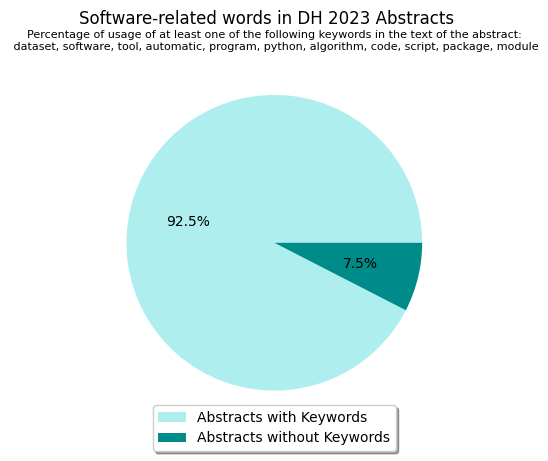

In [ ]:
percentage_without_keywords = (df.keywords.value_counts()['none'] / len(df)) * 100
percentage_with_keywords = 100 - percentage_without_keywords

labels = ['Abstracts with Keywords',
          'Abstracts without Keywords']
sizes = [percentage_with_keywords,
         percentage_without_keywords]
colors = ['paleturquoise',
          'darkcyan']

plt.pie(sizes,
        colors=colors,
        autopct='%1.1f%%')
plt.suptitle("Software-related words in DH 2023 Abstracts")
plt.title('\nPercentage of usage of at least one of the following keywords in the text of the abstract:\n '+', '.join(keywords), size=8)

plt.legend(labels,
           loc='upper center',
           bbox_to_anchor=(0.5, +0.08),
           fancybox=True,
           shadow=True)

plt.savefig('keywordpie2.png',
            dpi=300,
            transparent=True)
plt.show()